In [3]:
#pip install gensim konlpy

In [4]:
import pandas as pd
import numpy as np
import pickle
from tqdm import tqdm
import warnings
warnings.filterwarnings('ignore', category=DeprecationWarning)

In [5]:
from google.colab import drive

drive.mount('/content/drive')


Mounted at /content/drive


In [23]:
df0 = pd.read_csv('/content/drive/My Drive/data/DCX/미니프로젝트/Cluster0(1).csv',encoding = 'utf-8-sig')
df1 = pd.read_csv('/content/drive/My Drive/data/DCX/미니프로젝트/Cluster1.csv',encoding = 'utf-8-sig')

In [24]:
with open('/content/drive/My Drive/data/DCX/미니프로젝트/Cluster2.pkl','rb') as f:
    df2 = pickle.load(f)

In [36]:
df1

,review,re_review,review_words,action_cluster
0,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 ...,예금의 진실 문득 투자를 하고 경제의 흐름을 알아가니왜 예금을 했었나난 단지 안정...,"['예금', '진실', '문득', '투자', '경제', '흐름', '예금', '안정...",3
1,우당탕탕 다신 안가고싶은 삼성병원 가지베이컨그라탕해먹기 미친 폭우랑 전쟁하기 ...,우당탕탕 다신 안가고싶은 삼성병원 가지베이컨그라탕해먹기 미친 폭우랑 전쟁하기 급 ...,"['삼성', '병원', '가지', '베이컨', '그라탕', '먹기', '미치다', ...",2
2,드디어 개월 간의 학년 학기가 막을 내렸다개월간 나는 정말 쉬지 않고 달려...,드디어 개월 간의 학년 학기가 막을 내렸다개월간 나는 정말 쉬지 않고 달려 온 것...,"['개월', '간의', '학년', '학기', '월간', '정말', '버프', '학점...",3
3,시작 게을러져서 아니면 글 못씀 주에 한 번 써야되는거같은데 상품은 ...,시작 게을러져서 아니면 글 못씀 주에 한 번 써야되는거같은데 상품은 못받아도 다시...,"['시작', '게으르다', '아니다', '상품', '다시', '근황', '프로포즈'...",4
4,월 편의점 짱구스트랩 새마을금고 예금 어제 미뤘던 할 일은행가기를 했다최근에 적금도...,월 편의점 짱구스트랩 새마을금고 예금 어제 미뤘던 할 일은행가기를 했다최근에 적금도...,"['편의점', '짱구', '스트랩', '새마을금고', '예금', '어제', '은행가...",4
...,...,...,...,...
515,직장인 휴일투오프 교대근무 휴일엔 먹방 직장인 데이트 신입사원 신입 귀굴 부업관심...,직장인 휴일투오프 교대근무 휴일엔 먹방 직장인 데이트 신입사원 신입 귀굴 부업관심...,"['직장인', '휴일', '오프', '교대근무', '휴일', '먹방', '직장인',...",3
516,정산 어느새 주차 이번주에는 꽤 많은 일이 있어서 저번보단 적을 게 그래도 좀 ...,정산 어느새 주차 이번주에는 꽤 많은 일이 있어서 저번보단 적을 게 그래도 좀 있...,"['정산', '어느새다', '주차', '많다', '저번', '근로장려금', '반기'...",2
517,탕진잼 근데 원서비가 인 수학교를 갔어유 아침이 조금 늦게 나오고 버스 기...,탕진잼 근데 원서비가 인 수학교를 갔어유 아침이 조금 늦게 나오고 버스 기다리고 ...,"['탕진', '학교', '어유', '아침', '버스', '커피', '사고', '정각...",2
518,아홉번째 제출합니다 생일축하 아 날씨 진짜 미친듯물 속에서 숨 쉬는 기분누...,아홉번째 제출합니다 생일축하 아 날씨 진짜 미친듯물 속에서 숨 쉬는 기분누가 분무...,"['제출', '생일', '축하', '날씨', '미치다', '기분', '누가', '분...",2


In [26]:
df = pd.concat([df0,df1,df2])

In [30]:
df = df.drop(columns= ['Unnamed: 0','re_review'], axis=1)

In [46]:
df['cluster']  = df['cluster'].astype(int)

In [47]:
#df.to_csv('/content/drive/My Drive/data/DCX/미니프로젝트/cluster_ext.csv',encoding = 'utf-8-sig')

In [40]:
df

,review,cluster,review_words,action_cluster
0,차 이번 주에 무엇을 했나요 주차 했다 갔다 샀다 먹었다 봤다 ...,0.0,"['주차', '구별', '특별하다', '감정', '치료', '대한', '생각', '...",2
1,역대급 기묘한 날 포스팅은 너무 오랜만뭐 항상 오랜만인거 같은데 진짜 갓생 ...,0.0,"['역대', '기묘하다', '포스팅', '항상', '산다', '힘들다', '학교',...",5
2,면접보는것도 지친다 은 시까지 오라고 해서 오전에 외출 시간 쓰고 면접보러 왔다 ...,0.0,"['면접', '오라', '오전', '외출', '면접', '시로', '회사', '생각...",1
3,원래 생일은 한 달이잖아요 잊힐 때쯤 쓰는가을생 여성의 포도가 철인가봐아부지가...,0.0,"['원래', '생일', '여성', '포도', '철인', '아부지', '간식', '포...",3
4,팀 마침내 당첨되다 상상도 못한 일이 벌어지고 말았다바로 내가 만 포인트...,0.0,"['마침내', '당첨', '상상', '포인트', '당첨', '소식', '로거', '...",3
...,...,...,...,...
1007,앱테크진행중 앱테크 부수입 꼭 해야하는 스타벅스 문화상품권 전원증정 근데 하나는 ...,2.0,"[테크, 진행중, 테크, 부수입, 스타벅스, 문화, 상품권, 전원, 증정, 까다롭다...",2
1014,스물셋 으로 보는 월의 첫주 밸런스프렌즈 토글 리더스 나한테 많은 영감을 주는 쯔지...,2.0,"[스물, 밸런스, 프렌즈, 토글, 리더, 많다, 영감, 지언, 보고, 다방면, 여러...",3
1015,직장인 갓생 탤이의 갓생 겨울방학 끝 동분서주 바쁜 탤이 공주놀이 넘 즐거워 모...,2.0,"[직장인, 탤이, 겨울방학, 동분서주, 바쁘다, 공주, 즐겁다, 모든, 포지션, 최...",3
1016,청년전세임대주택 청약 일정 신청 서울특별시 순위로 청약 신청 위치한국토지주택공사...,2.0,"[청년, 전세, 임대주택, 청약, 일정, 신청, 서울특별시, 순위, 청약, 신청, ...",3


In [41]:
df.isna().sum()

,0
review,0
cluster,0
review_words,0
action_cluster,0


In [9]:
import json

with open('/content/drive/My Drive/data/DCX/DCX수업자료/SentiWord_info.json', encoding = 'utf-8-sig',mode = 'r') as f:
    sent_dicts = json.load(f)

In [10]:
sent_df = pd.DataFrame(sent_dicts)
sent_df.polarity.value_counts()

,count
polarity,
-1,5030
-2,4799
2,2602
1,2269
0,154


In [48]:
#sentiment score

def sentiment_score(sent_dicts, token_list):

    result_list = []
    for token in token_list:
        for s in sent_dicts:
            if s['word'] == token:
                result = s['word'], s['polarity']
                result_list.append(result)
    return result_list

In [49]:
#형태소 재분리

from konlpy.tag import Okt
okt=Okt()

from kiwipiepy import Kiwi
kiwi = Kiwi()

In [17]:
#pip install kiwipiepy

In [50]:
def okt_pos_tagging(string):
    string = kiwi.space(string)
    post_words = okt.morphs(string, stem = True, norm = True)
    return post_words

In [51]:
df.head()

,review,cluster,review_words,action_cluster
0,차 이번 주에 무엇을 했나요 주차 했다 갔다 샀다 먹었다 봤다 ...,0,"['주차', '구별', '특별하다', '감정', '치료', '대한', '생각', '...",2
1,역대급 기묘한 날 포스팅은 너무 오랜만뭐 항상 오랜만인거 같은데 진짜 갓생 ...,0,"['역대', '기묘하다', '포스팅', '항상', '산다', '힘들다', '학교',...",5
2,면접보는것도 지친다 은 시까지 오라고 해서 오전에 외출 시간 쓰고 면접보러 왔다 ...,0,"['면접', '오라', '오전', '외출', '면접', '시로', '회사', '생각...",1
3,원래 생일은 한 달이잖아요 잊힐 때쯤 쓰는가을생 여성의 포도가 철인가봐아부지가...,0,"['원래', '생일', '여성', '포도', '철인', '아부지', '간식', '포...",3
4,팀 마침내 당첨되다 상상도 못한 일이 벌어지고 말았다바로 내가 만 포인트...,0,"['마침내', '당첨', '상상', '포인트', '당첨', '소식', '로거', '...",3


In [52]:
sentiment = []

for i in tqdm(df['review']):
    token = okt_pos_tagging(i)
    score = sentiment_score(sent_dicts, token)
    sentiment.append(score)


100%|██████████| 1019/1019 [09:48<00:00,  1.73it/s]


In [53]:
avg_sents = []

for sents in tqdm(sentiment):
    sent_score = sum( [int(i[1]) for i in sents])
    avg_sents.append(sent_score)

100%|██████████| 1019/1019 [00:00<00:00, 80097.37it/s]


감성 점수

In [54]:
avg_sents[0:10]

[9, -15, -10, 39, 0, -20, 18, -34, 4, 8]

In [55]:
df['sentiment_score'] = avg_sents

In [56]:
df.cluster.value_counts()

,count
cluster,
1,520
2,333
0,166


In [57]:
sent_dict = dict()

for actor in df['cluster'].unique():
    actor_df = df[df['cluster'] == actor]

    for action in actor_df['action_cluster'].unique():
        action_scores = actor_df[actor_df['action_cluster'] == action]['sentiment_score']
        action_score = np.mean(action_scores)
        sent_dict[f'Actor{actor}_Action{action}'] = action_score


In [58]:
sent_dict

{'Actor0_Action2': 9.181818181818182,
 'Actor0_Action5': 21.571428571428573,
 'Actor0_Action1': 4.0508474576271185,
 'Actor0_Action3': 3.53125,
 'Actor0_Action4': 4.714285714285714,
 'Actor1_Action3': 2.3388429752066116,
 'Actor1_Action2': 7.403141361256544,
 'Actor1_Action4': 10.134831460674157,
 'Actor1_Action1': 0.3277310924369748,
 'Actor2_Action4': 3.403361344537815,
 'Actor2_Action3': 6.846153846153846,
 'Actor2_Action1': 5.116883116883117,
 'Actor2_Action2': 9.021739130434783}

In [59]:
from sklearn.preprocessing import MinMaxScaler

In [60]:
data = sent_dict.values()

data = np.array(list(data)).reshape(-1,1)

In [62]:
scaler = MinMaxScaler(feature_range=(-10,10))

trasnformed_data = scaler.fit_transform(data)

In [63]:
score_result = trasnformed_data.flatten().tolist()
score_result = [round(i,4) for i in score_result]
score_result

[-1.6643,
 10.0,
 -6.4949,
 -6.984,
 -5.8703,
 -8.1066,
 -3.3388,
 -0.767,
 -10.0,
 -7.1044,
 -3.8632,
 -5.4912,
 -1.815]

In [64]:
for key, new_value in zip(sent_dict.keys(), score_result):
    sent_dict[key] = new_value

In [65]:
sent_dict

{'Actor0_Action2': -1.6643,
 'Actor0_Action5': 10.0,
 'Actor0_Action1': -6.4949,
 'Actor0_Action3': -6.984,
 'Actor0_Action4': -5.8703,
 'Actor1_Action3': -8.1066,
 'Actor1_Action2': -3.3388,
 'Actor1_Action4': -0.767,
 'Actor1_Action1': -10.0,
 'Actor2_Action4': -7.1044,
 'Actor2_Action3': -3.8632,
 'Actor2_Action1': -5.4912,
 'Actor2_Action2': -1.815}

In [66]:
sents_df = pd.DataFrame(sent_dict.items(), columns = ['Action','Satisfaction'])
sents_df

,Action,Satisfaction
0,Actor0_Action2,-1.6643
1,Actor0_Action5,10.0000
2,Actor0_Action1,-6.4949
3,Actor0_Action3,-6.9840
4,Actor0_Action4,-5.8703
5,Actor1_Action3,-8.1066
6,Actor1_Action2,-3.3388
7,Actor1_Action4,-0.7670
8,Actor1_Action1,-10.0000
9,Actor2_Action4,-7.1044


Importance

In [67]:
from collections import Counter

In [68]:
# importance
importance_check = []

for actor , action in zip(df['cluster'], df['action_cluster']):
    action_flag = 'Actor'+str(actor)+'_Action'+str(action)
    importance_check.append(action_flag)

In [69]:
importance_check[:10]

['Actor0_Action2',
 'Actor0_Action5',
 'Actor0_Action1',
 'Actor0_Action3',
 'Actor0_Action3',
 'Actor0_Action4',
 'Actor0_Action3',
 'Actor0_Action2',
 'Actor0_Action3',
 'Actor0_Action5']

In [70]:
freq = Counter(importance_check)
freq

Counter({'Actor0_Action2': 33,
         'Actor0_Action5': 14,
         'Actor0_Action1': 59,
         'Actor0_Action3': 32,
         'Actor0_Action4': 28,
         'Actor1_Action3': 121,
         'Actor1_Action2': 191,
         'Actor1_Action4': 89,
         'Actor1_Action1': 119,
         'Actor2_Action4': 119,
         'Actor2_Action3': 91,
         'Actor2_Action1': 77,
         'Actor2_Action2': 46})

In [71]:
importance_dict = dict()

total_count = sum(freq.values())

for key, value in freq.items():
    importance  = (value/total_count)*100
    importance_dict[key] = importance

importance_dict

{'Actor0_Action2': 3.23846908734053,
 'Actor0_Action5': 1.3738959764474974,
 'Actor0_Action1': 5.789990186457311,
 'Actor0_Action3': 3.140333660451423,
 'Actor0_Action4': 2.747791952894995,
 'Actor1_Action3': 11.874386653581944,
 'Actor1_Action2': 18.743866535819432,
 'Actor1_Action4': 8.73405299313052,
 'Actor1_Action1': 11.678115799803729,
 'Actor2_Action4': 11.678115799803729,
 'Actor2_Action3': 8.930323846908735,
 'Actor2_Action1': 7.556427870461237,
 'Actor2_Action2': 4.5142296368989205}

In [72]:
data = importance_dict.values()
data = np.array(list(data)).reshape(-1,1)

scaler = MinMaxScaler(feature_range=(0,10))
trasnformed_data = scaler.fit_transform(data)


In [73]:
score_result = trasnformed_data.flatten().tolist()
score_result = [round(i,4) for i in score_result]
score_result

[1.0734,
 0.0,
 2.5424,
 1.0169,
 0.791,
 6.0452,
 10.0,
 4.2373,
 5.9322,
 5.9322,
 4.3503,
 3.5593,
 1.8079]

In [75]:
for key, new_value in zip(importance_dict.keys(), score_result):
    importance_dict[key] = new_value
importance_dict

{'Actor0_Action2': 1.0734,
 'Actor0_Action5': 0.0,
 'Actor0_Action1': 2.5424,
 'Actor0_Action3': 1.0169,
 'Actor0_Action4': 0.791,
 'Actor1_Action3': 6.0452,
 'Actor1_Action2': 10.0,
 'Actor1_Action4': 4.2373,
 'Actor1_Action1': 5.9322,
 'Actor2_Action4': 5.9322,
 'Actor2_Action3': 4.3503,
 'Actor2_Action1': 3.5593,
 'Actor2_Action2': 1.8079}

In [76]:
importance_list = []

for action in sents_df['Action']:
    importance_list.append(importance_dict[action])

In [77]:
sents_df['Importance'] = importance_list
sents_df

,Action,Satisfaction,Importance
0,Actor0_Action2,-1.6643,1.0734
1,Actor0_Action5,10.0000,0.0000
2,Actor0_Action1,-6.4949,2.5424
3,Actor0_Action3,-6.9840,1.0169
4,Actor0_Action4,-5.8703,0.7910
5,Actor1_Action3,-8.1066,6.0452
6,Actor1_Action2,-3.3388,10.0000
7,Actor1_Action4,-0.7670,4.2373
8,Actor1_Action1,-10.0000,5.9322
9,Actor2_Action4,-7.1044,5.9322


Opportunity

In [78]:
def Opportunity_score(satisfaction, importance):
    result = importance + max(importance-satisfaction, 0)
    return result

In [79]:
Opportunity_list = []

for s, i in zip(sents_df['Satisfaction'], sents_df['Importance']):
    Opportunity_list.append(Opportunity_score(s,i))

sents_df['Opportunity_score'] = Opportunity_list

In [104]:
sents_df.sort_values('Action')

,Action,Satisfaction,Importance,Opportunity_score
2,Actor0_Action1,-6.4949,2.5424,11.5797
0,Actor0_Action2,-1.6643,1.0734,3.8111
3,Actor0_Action3,-6.9840,1.0169,9.0178
4,Actor0_Action4,-5.8703,0.7910,7.4523
1,Actor0_Action5,10.0000,0.0000,0.0000
8,Actor1_Action1,-10.0000,5.9322,21.8644
6,Actor1_Action2,-3.3388,10.0000,23.3388
5,Actor1_Action3,-8.1066,6.0452,20.1970
7,Actor1_Action4,-0.7670,4.2373,9.2416
11,Actor2_Action1,-5.4912,3.5593,12.6098


In [83]:
#pip install adjustText

Opportunity area

In [82]:
import matplotlib.pyplot as plt
from adjustText import adjust_text

In [84]:
actions = sents_df.Action

color = np.random.rand(len(actions), 3)

Importances = sents_df.Importance
satisfaction = sents_df.Satisfaction

AttributeError: 'float' object has no attribute 'mean'

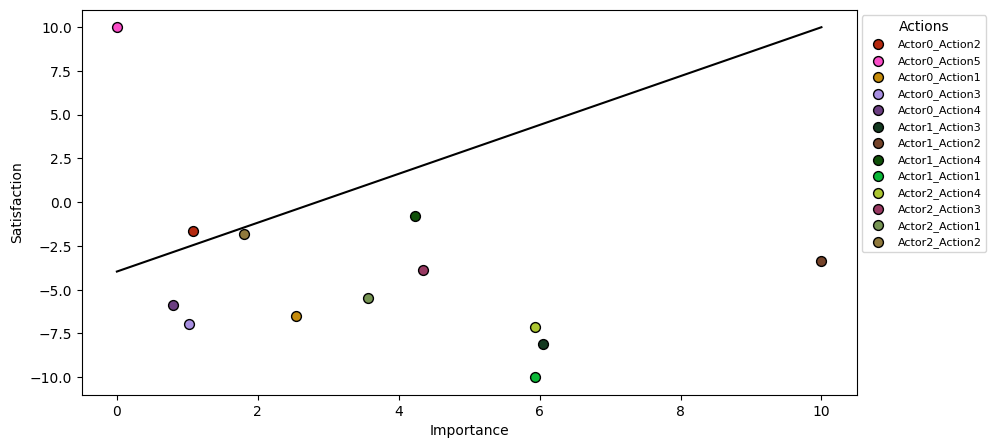

In [109]:
plt.figure(figsize = (10,5))

for i, action in enumerate(actions):
    plt.scatter(Importances[i], satisfaction[i], c = [color[i]] , label = action , s = 50 , edgecolors= 'black')

plt.legend(title='Actions', fontsize = 8, title_fontsize=10, loc='best', bbox_to_anchor=(1,1))
plt.xlabel('Importance')
plt.ylabel('Satisfaction')

#만족도
xdata = [0,10]
ydata = [satisfaction.mean(),10]

plt.plot(xdata, ydata, 'k-')

#중요도
x_data = [importance.mean(), 10]
y_data = [-10, 10]
plt.plot(xdata, ydata, color = 'blue', linestyle = '-')

texts = []

for i , action in enumerate(actions):
    texts.append(plt.text(Importances[i], satisfaction[i], action, fontsize = 13, ha = 'left'))

adjust_text(texts, arrowprops = dict(arrowstyle = '-', color = 'grey', lw = 1))

plt.grid(True)
plt.savefig('/content/drive/My Drive/data/DCX/미니프로젝트/result.png', dpi=300,bbox_inches = 'tight')
plt.show()

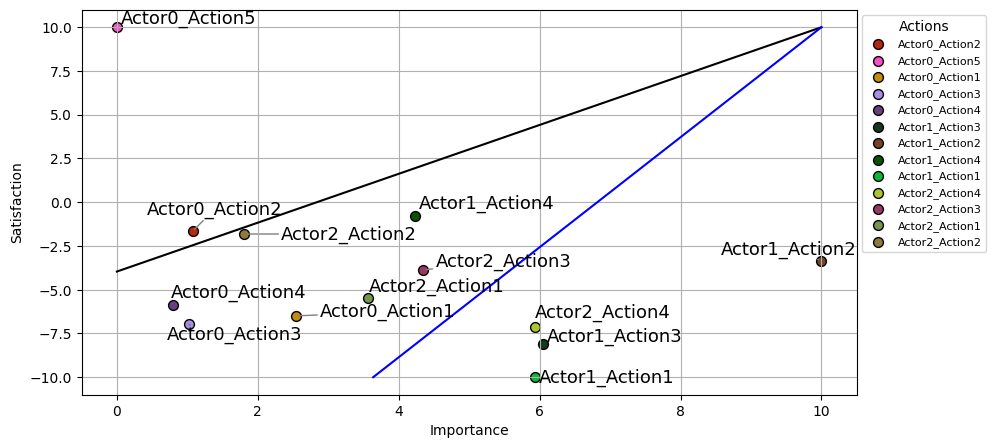

In [110]:
plt.figure(figsize = (10,5))

for i, action in enumerate(actions):
    plt.scatter(Importances[i], satisfaction[i], c = [color[i]] , label = action , s = 50 , edgecolors= 'black')

plt.legend(title='Actions', fontsize = 8, title_fontsize=10, loc='best', bbox_to_anchor=(1,1))
plt.xlabel('Importance')
plt.ylabel('Satisfaction')

#만족도
xdata = [0,10]
ydata = [satisfaction.mean(),10]

plt.plot(xdata, ydata, 'k-')

#중요도

x_data = [Importances.mean(), 10]
y_data = [-10, 10]
plt.plot(x_data, y_data, color = 'blue', linestyle = '-')

texts = []

for i , action in enumerate(actions):
    texts.append(plt.text(Importances[i], satisfaction[i], action, fontsize = 13, ha = 'left'))

adjust_text(texts, arrowprops = dict(arrowstyle = '-', color = 'grey', lw = 1))

plt.grid(True)
plt.savefig('/content/drive/My Drive/data/DCX/미니프로젝트/result.png', dpi=300,bbox_inches = 'tight')
plt.show()

In [97]:
df[(df['cluster'] == 0) & (df['action_cluster'] == 5)]

,review,cluster,review_words,action_cluster,sentiment_score
1,역대급 기묘한 날 포스팅은 너무 오랜만뭐 항상 오랜만인거 같은데 진짜 갓생 ...,0,"['역대', '기묘하다', '포스팅', '항상', '산다', '힘들다', '학교',...",5,-15
9,청년주거임대료월세 지원 년 차 세종 청년 주거임대료 지원 년 까지 세종청년희망...,0,"['청년', '주거', '임대료', '월세', '지원', '세종', '청년', '주...",5,8
21,생각 청년월세 특별지원 내가 받을 수 있을까요 여러분들과 을 하는 큐큐입니다 청...,0,"['생각', '청년', '월세', '특별', '지원', '청년', '걱정', '주거...",5,20
22,재테크 청년전세임대주택 총 정리 신청방법 기간 우선순위순위 순위 청년들의 주거비 부...,0,"['재테크', '청년', '전세', '임대주택', '정리', '신청', '방법', ...",5,18
55,해외주재원의 재테크 주재원이 되면 일반 회사원보다 급여가 많아서 돈 좀 모은다...,0,"['해외', '주재', '재테크', '주재', '일반', '회사원', '급여', '...",5,-3
71,점심으로 월요일은 손수제비를 먹었고 화요일은 돈까츠를 먹었는데 그리고 생각나...,0,"['점심', '월요일', '손수', '제비', '화요일', '돈까츠', '지도', ...",5,2
75,링커리어콘텐츠에디터 기 청년도약계좌 년이면 억이라고 우리 함께 알아봐요 링커리어 ...,0,"['커리어', '콘텐츠', '에디터', '청년', '도약', '계좌', '억이', ...",5,49
84,관조하는 돌고 돌아 다시 내게로 소름이 돋는다 소름이 돋아지난 년과 년에 나는 인스...,0,"['관조', '다시', '내게로', '소름', '소름', '인스타그램', '정말',...",5,21
104,독립 청약역세권 청년 주택 당첨 발표 은 역세권 청년 주택 서류심사 대상자 발표하...,0,"['독립', '청약', '역다', '청년', '주택', '당첨', '발표', '역다...",5,3
125,공고 월 넷째 주 수도권 주택임대 청약 일정 모음 구로 은평 성남 남양주 등 발바...,0,"['공고', '넷째', '수도권', '주택', '임대', '청약', '일정', '모...",5,18


In [100]:
sent_dist

NameError: name 'sent_dist' is not defined